Katherine Mantych

Project 01

224-775-0356

In [49]:
#required imports for the entire project
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from IPython.display import Image
from IPython.core.display import HTML 

The following cells include any functions used in the project

In [50]:
def mahalanobis2(inv_cov_mat, means_mat, obervation_mat):
    diff = np.subtract(obervation_mat, means_mat)
    diffT = np.transpose(diff)
    temp = np.matmul(diff, inv_cov_mat)
    return np.matmul(temp, diffT)[0]

In [51]:
def find_outliers(df, acr):
        
        cov = df.cov()
        invcov = np.linalg.inv(cov)
        means_mat = np.transpose(pd.DataFrame(df.mean()).to_numpy())
        outliers = False
        for i in range (0, 50):
            if mahalanobis2(invcov, means_mat, df.iloc[i].to_numpy()) >= acr:
                print('outlier at index ' + str(i))
                outliers = True
            
        if outliers == False:
            print('no outliers found')
           
        del cov, invcov, means_mat
        return

In [52]:
#alpha is assumed to be .05
def ACR(p,n):
    Fc = f.ppf(1-.05/n, p, n-p-1)
    return (p*(n-1)**2*Fc)/(n*(n-p-1)+(n*p*Fc))

In [53]:
def plot_outlier(df, outlier_index):
    plt.scatter(df['petallength'], df['sepallength'])
    plt.annotate("outlier", (df.iloc[outlier_index][2], df.iloc[outlier_index][0]))
    plt.show() 
   
    plt.scatter(df['petalwidth'], df['sepalwidth'])
    plt.annotate("outlier", (df.iloc[outlier_index][3], df.iloc[outlier_index][1]))
    plt.show()

In [54]:
def make_plot(df, x, y, pp):

    plt.scatter(df[x], df[y])

    #change the title
    plt.suptitle( y + ' vs ' + x, fontsize = 20)

    #change the x and y axis labels
    plt.xlabel(x)
    plt.ylabel(y)
    plt.savefig(pp, format='pdf')
    plt.close()
   
    return

Problem 1

In [55]:
#allow user to input file name. Default is the local location of iris.arff
user_wants_to_manually_enter_filename=input('do you want to enter .arff filename? If not, the default file location fo the iris dataset will be used. (y/n) ')
if user_wants_to_manually_enter_filename == 'y':
    file_name=input('enter filename with extension: ')
else:
    file_name = 'input/iris.arff'
    
#load the iris data into a pandas dataframe
iris_data = arff.loadarff(file_name)
iris_df = pd.DataFrame(iris_data[0])

#preproccesing. label class as 1, 2, 3 vs their string names
del iris_df['class']
iris_data_with_class = pd.DataFrame(iris_df)
list1 = [1] * 50
list2 = [2] * 50
list3 = [3] * 50
class_list = list1 + list2 + list3
iris_data_with_class.insert(4, "class", class_list, True)

do you want to enter .arff filename? If not, the default file location fo the iris dataset will be used. (y/n) n


<b>Problem 2</b>

In [60]:
#determine if user wants to plot graphs
user_wants_plots = input('Would you like to plot two features? (y/n) ')

#group the observations by class so that they will have different colors when plotted
groups = iris_data_with_class.groupby("class")
#create file to save plots to. Alert user to filename
pp = PdfPages('irisplots.pdf')   
    
while user_wants_plots == 'y':
    
    print('plots will be saved to a file named irisplots.pdf')
    
    #determine features to be plotted
    print('available features: petallength, petalwidth, sepallength, sepalwidth')
    y = input('enter y-axis feature name: ')
    x = input('enter x-axis feature name: ')

    #plot the observations
    for name, group in groups:
        fig = plt.plot(group[x], group[y], marker="o", linestyle="", label=name)

    #changes the name of the legend items    
    L=plt.legend()
    L.get_texts()[0].set_text('class 1: setosa')
    L.get_texts()[1].set_text('class 2: versicolor')
    L.get_texts()[2].set_text('class 3: virginical')

    #change the title
    plt.suptitle(y + ' vs ' + x, fontsize = 20)

    #change the x and y axis labels
    plt.xlabel(x)
    plt.ylabel(y)

    #save the image to a file
    plt.savefig(pp, format='pdf')
    plt.clf()
    
    #ask if the user wants another plot
    user_wants_plots = input('Would you like to make another plot? (y/n) ')

pp.close()

Would you like to plot two features? (y/n) n


<b>Problem 3 Part(a)</b> <br>
For my sorting function, I am using <b>pandas.DataFrame.sort_values</b> and I specify that I want to use merge sort. I decided to use merge sort for 2 reason, the first being it has better time-complexity than any other sorting method. Second, I ran several trials where I took the wall time of the merge sort and the quick sort versions. Every time, merge sort performed better in real time than quicksort for the iris data. Here is the pseudocode for mergesort from Introduction to Algorithms: <br>
<br>
MERGE-SORT(A, p, r) <br>
&emsp;if p < r<br>
&emsp;&emsp;		q = floor((p+r)/2)<br>
&emsp;&emsp;		MERGE-SORT(A, p, q)<br>
&emsp;&emsp;		MERGE_SORT(A, q+1, r)<br>
&emsp;&emsp;		MERGE(A, p, q, r)<br>
<br>
<b>Problem 3 Part (b)</b> <br>
Merge sort has a time complexity of O(nlogn). 


<b>Problem 3 Part (c)</b>

In [61]:
#increase number of rows that are displayed so that we can see entire table if wanted
pd.set_option('display.max_rows', 200)

#sort by each of the four features and save a df that can be accessed later
sorted_by_sepallength = iris_data_with_class.sort_values(by=['sepallength'], ascending=True, inplace=False, kind='quicksort')
sorted_by_sepalwidth = iris_data_with_class.sort_values(by=['sepalwidth'], ascending=True, inplace=False, kind='quicksort')
sorted_by_petallength = iris_data_with_class.sort_values(by=['petallength'], ascending=True, inplace=False, kind='quicksort')
sorted_by_petalwidth = iris_data_with_class.sort_values(by=['petalwidth'], ascending=True, inplace=False, kind='quicksort')

<b> Problem 3 Part (d) </b> <br>
The cell below evaluates the sorted lists by counting how many observations are from class 1, class 2 and class 3 in each of the three groups. Group 1 is the first 50 observations in a sorted list, group 2 the next 50, and group 3 the last 50. This is to determine if there is any seperability in the groups when sorted by a feature.

In [62]:
#G1C1 means the number of class 1 observations in the first group of 50
#G1C2 means the number of class 2 observations in the group, and so on
k=0
seperation_results_df = pd.DataFrame(columns=['sepallength','sepalwidth','petallength', 'petalwidth' ], index=['G1C1', 'G1C2', 'G1C3', 'G2C1', 'G2C2', 'G2C3', 'G3C1', 'G3C2', 'G3C3'])
for j in [sorted_by_sepallength, sorted_by_sepalwidth, sorted_by_petallength, sorted_by_petalwidth]:
    num_class1, num_class2, num_class3 = 0, 0, 0
    for i in range(0,50):
        c = j.iloc[i, 4]
        if c == 1:
            num_class1 = num_class1 + 1
        if c == 2:
            num_class2 = num_class2 + 1
        if c == 3:
            num_class3 = num_class3 + 1
    seperation_results_df.iloc[0,k] = num_class1
    seperation_results_df.iloc[1,k] = num_class2
    seperation_results_df.iloc[2,k] = num_class3
    num_class1, num_class2, num_class3 = 0, 0, 0
    for i in range(50,100):
        c = j.iloc[i, 4]
        if c == 1:
            num_class1 = num_class1 + 1
        if c == 2:
            num_class2 = num_class2 + 1
        if c == 3:
            num_class3 = num_class3 + 1
    seperation_results_df.iloc[3,k] = num_class1
    seperation_results_df.iloc[4,k] = num_class2
    seperation_results_df.iloc[5,k] = num_class3
    num_class1, num_class2, num_class3 = 0, 0, 0
    for i in range(100,150):
        c = j.iloc[i, 4]
        if c == 1:
            num_class1 = num_class1 + 1
        if c == 2:
            num_class2 = num_class2 + 1
        if c == 3:
            num_class3 = num_class3 + 1
    seperation_results_df.iloc[6,k] = num_class1
    seperation_results_df.iloc[7,k] = num_class2
    seperation_results_df.iloc[8,k] = num_class3
    num_class1, num_class2, num_class3 = 0, 0, 0
    k = k+1
seperation_results_df

,sepallength,sepalwidth,petallength,petalwidth
G1C1,43,1,50,50
G1C2,6,30,0,0
G1C3,1,19,0,0
G2C1,7,13,0,0
G2C2,31,16,47,46
G2C3,12,21,3,4
G3C1,0,36,0,0
G3C2,13,4,3,4
G3C3,37,10,47,46


From the above table, I concluded that there is not linear separability between any of the classes, however petal length and petal width are a better indication of which class the observation belongs to compared to sepal length and width.

<b> Problem 3 Part (e) </b><br><br>
&emsp;i.	There was no single feature that could linearly separate all three classes; however sepal length and sepal width could separate group 1 from the other 2 groups. <br><br>
&emsp;ii.	As a metric to determine separation, I wrote a function to iterate through the sorted data frames and to count how many of each class was in the first group of 50, second group of 50, and the third group of 50.  Below I have a table for the results for each of the sorted lists, with the majority class highlighted in each row. If the majority class occupied all 50 positions, I considered the feature able to separate that class from the other. I used this metric because it is a straightforward way to determine if there is any comingling when the data is sorted by feature.

![title](prob3partepic1.png)

![title](prob3part3pic2.png)


<b>Problem 4 Part (a)</b> <br>
For my algorithm, I decided to implement the Wilks Outlier Detection as described in the Data Processing II document and as implemented in Trujillo-Ortiz, et al. (2008). Below is the pseudocode for the algorithm I implemented.<br><br>
Preprocessing <br>
&emsp;Remove the “class” column from the data frame<br>
&emsp;Separate the three classes into three separate data frames<br>
<br>
Processing<br>
&emsp;For each data frame:<br>
&emsp;Find the inverse of the covariance matrix<br>
&emsp;Find the mean for each of the features<br>
&emsp;For each observation<br>
&emsp;&emsp;Calculate the Malanobis distance<br>
&emsp;See if the distance is greater or equal to the critical value described in Data Processing II<br>
&emsp;&emsp;If yes, then print that at outlier was found, and at what index<br>
<br>If no outliers are found, then print “no outliers found”


<b>Problem 4 Part (b)</b><br>
The time-complexity for this algorithm is O(n<sup>3</sup>) because it is dominated by the time required to find the covariance matrix for each of the classes.  


<b>Problem 4 Part (c)</b><br>

In [63]:
#preprocessing so that we can easily calculate covariance
#split into 3 dataframes, one for each type
grouped = iris_data_with_class.groupby('class')
    #preprocessing c1, ppc2, ppc3
ppc1 = grouped.get_group(1)
del ppc1['class']
class2_df = grouped.get_group(2)
ppc2 = class2_df
del ppc2['class']
class3_df = grouped.get_group(3)
ppc3 = class3_df
del ppc3['class'] 

#create fake outlier for testing
ppc3_with_outlier = ppc3.copy()
ppc3_with_outlier.iloc[10][2] = 10

In [64]:
#determine if any otliers exist
print('for class 1')
find_outliers(ppc1, ACR(4,50))
print('for class 2')
find_outliers(ppc2, ACR(4,50))
print('for class 3')
find_outliers(ppc3, ACR(4,50))


for class 1
no outliers found
for class 2
no outliers found
for class 3
no outliers found


The results of using the Wilks Outlier detection method result in no outliers being identified. These results were confirmed by inputing the iris data into the implementation by Trujillo-Ortiz, et al. (2008).

<b>Problem 4 Part (d)</b><br>
Below I created 3 pdfs, each of which contain the 6 different combos of feature vs feature. Th results are saved in the output folder. Out of all of the plots, I only spotted two possible outliers, observation #41 and observation #106. <br>
#41 is in the class 1 pdf plot of sepallength vs sepalwidth with values of 4.5 and 2.1 respectively.<br>
#106 is in the class 3 pdf plot of sepallength vs petallength with values of 4.9 and 4.5 respectively.<br>

In [65]:
pp = PdfPages('class 1 plots looking for outiers.pdf')
    
make_plot(ppc1, 'sepallength', 'sepalwidth', pp)
make_plot(ppc1, 'sepallength', 'petalwidth', pp)
make_plot(ppc1, 'sepallength', 'petallength', pp)
make_plot(ppc1, 'sepalwidth', 'petalwidth', pp)
make_plot(ppc1, 'sepalwidth', 'petallength', pp)
make_plot(ppc1, 'petalwidth', 'petallength', pp)    

pp.close()    

pp = PdfPages('class 2 plots looking for outiers.pdf')
    
make_plot(ppc2, 'sepallength', 'sepalwidth', pp)
make_plot(ppc2, 'sepallength', 'petalwidth', pp)
make_plot(ppc2, 'sepallength', 'petallength', pp)
make_plot(ppc2, 'sepalwidth', 'petalwidth', pp)
make_plot(ppc2, 'sepalwidth', 'petallength', pp)
make_plot(ppc2, 'petalwidth', 'petallength', pp)    

pp.close() 

pp = PdfPages('class 3 plots looking for outiers.pdf')
    
make_plot(ppc3, 'sepallength', 'sepalwidth', pp)
make_plot(ppc3, 'sepallength', 'petalwidth', pp)
make_plot(ppc3, 'sepallength', 'petallength', pp)
make_plot(ppc3, 'sepalwidth', 'petalwidth', pp)
make_plot(ppc3, 'sepalwidth', 'petallength', pp)
make_plot(ppc3, 'petalwidth', 'petallength', pp)    

pp.close()

Overall, I do not like the process of plotting data and looking for outliers in the way described in the prompt because it is arbitrary depending on whose viewing the data and how the plots are presented. It might be easier to identify outliers if the ranges of the x and y axis are extended. Another issue is that there are 4 features, and we cannot visualize that in a sinlge plot. Just because a point looks like an outlier does not mean that it actually is in terms of all features. I made a second  method to visualize outliers where once an outlier is identified, the user can display two charts: sepallength vs sepalwidth and petallength vs petalwidth. I chose those two plots because the sepal features are closer related to eachother than a sepal feature and a petal feature. The function then labels the outlier observation so that the observer can visually verify that it is indeed an outlier. Below is an example, where I inserted a fake outlier into the class 3 data, then plotted it to show what a user can expect when an outlier does exist.

for class 3 with one fake outlier at index 10
outlier at index 10


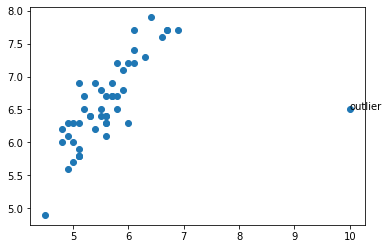

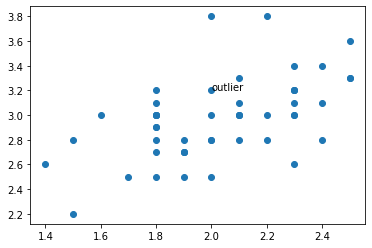

In [66]:
print('for class 3 with one fake outlier at index 10')
find_outliers(ppc3_with_outlier, ACR(4,50))
plot_outlier(ppc3_with_outlier, 10)

<b>Problem 4 Part (e)</b><br>
i.	Using the Wilks Outlier detection method as described in the Data Processing II document, no outliers were detected. I did not include the two observations identified in problem 4 part (d) because that was an arbitrary observation. 


<b>Problem 5 Part (a)</b><br> 
For this problem I implemented a Chi-squared statistical test to rank the features. I used the following link:<br>
https://www.datacamp.com/community/tutorials/feature-selection-python
<br>Below is the pseudocode for the algorithm:<br><br>
preprocessing<br>
&emsp;Separate the features from class into two separate numPy arrays<br>
processing<br>
&emsp;Perform the Chi Squared test<br>
&emsp;Print results<br>
<br>
<b>Problem 5 part (b)</b><br>
I am not sure of the underlying algorithm to compute the Chi-Squared statistic, but I am assuming that the function must iterate through all values once, so the running time is O(n).


<b>Problem 5 Part (c) </b>

In [67]:
array = iris_data_with_class.values
X = array[:, 0:4]
Y = array[:,4]
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 10.818   3.594 116.17   67.245]


<b>Problem 5 part (d)</b><br>
From part (c), the features were given the following scores:<br><br>

Sepal length: 116.17<br>
Sepal width: 67.245<br>
Petal length: 10.818<br>
Petal width: 3.594<br>
<br>
The higher the score, the more that feature effects which class the observation belongs too. The above findings are confirmed in the results from Problem 3 Part (e). The only linear separation occurs when sorted by sepal length and petal length, where class 1 is separated from class 2 and 3. There is also pretty good separability between class 2 and 3, as only 4 observations crossed groups in the sorted lists. 


<b>Problem 5 part (e)</b><br>
i.	sepal length and width can separate class 1 from class 2 and 3. This is because there is a range of lengths that only fall in the class 1 category, as flowers from the other two classes have a greater sepal length and width. <br>
ii.	Petal width has an extremely low score from problem 5 part (d). There is little variability is petal width among the different flowers observed. We can conclude that this feature could be dropped in a machine learning algorithm that is looking to predict which class a flower belongs.<br>
iii.	Problem 5 part (d) includes a metric, and so yes, a metric can be developed. This is useful because it gives us an idea of how much better one feature is compared to another.
